<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-06-29 20:49:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  17.3MB/s    in 10s     

2025-06-29 20:50:03 (14.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



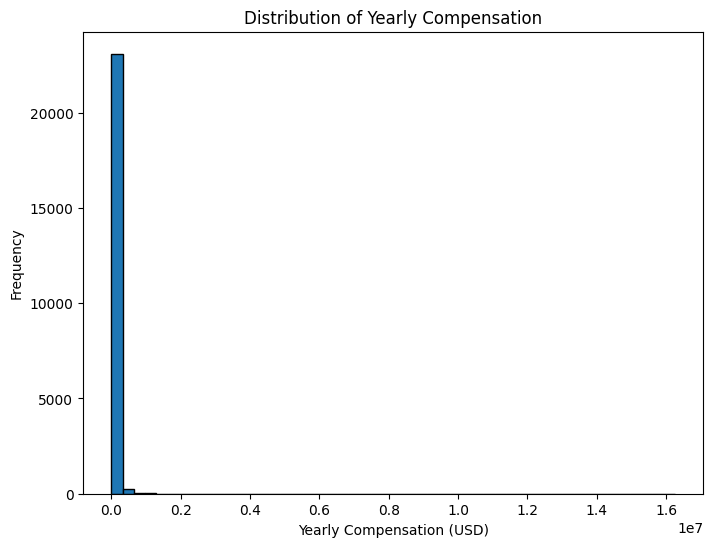

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [35]:
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': float('nan') # Handle 'Prefer not to say' by converting to NaN
}

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



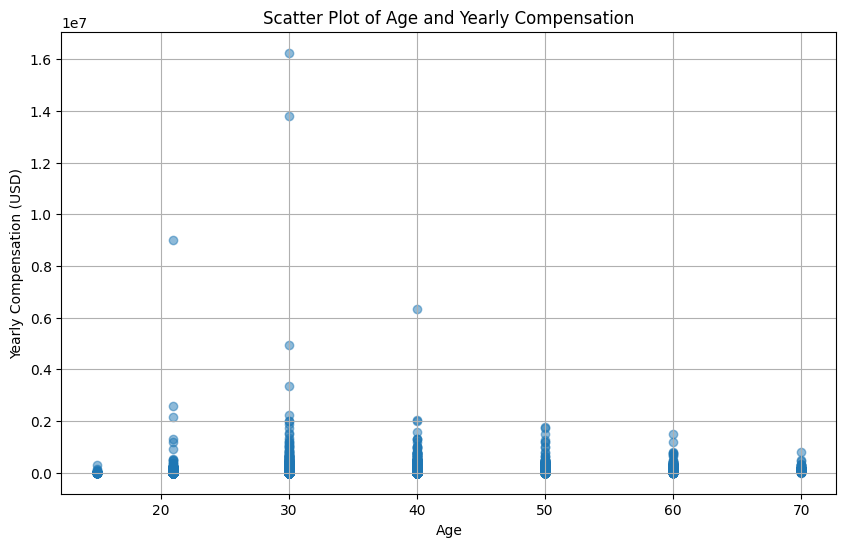

In [36]:
df['Age_numeric'] = df['Age'].map(age_mapping)
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['ConvertedCompYearly'], alpha=0.5)
plt.title('Scatter Plot of Age and Yearly Compensation')
plt.xlabel('Age')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


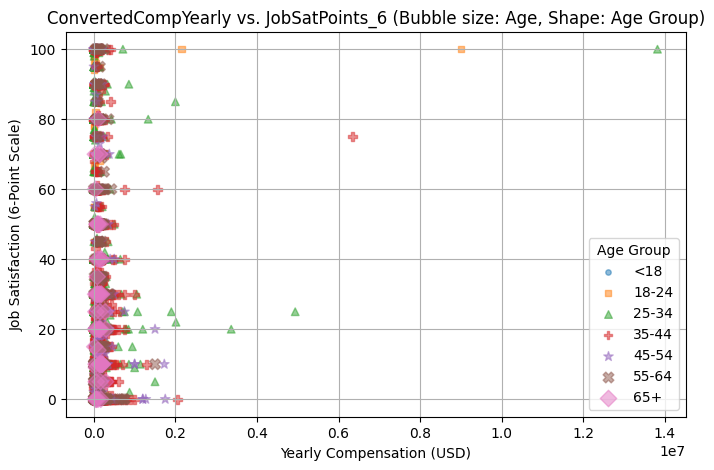

In [37]:
# Convert 'Age' column to numerical using the mapping
df['Age_numeric'] = df['Age'].map(age_mapping)

# Create age groups for coloring and legend
df_filtered_age_numeric = df.dropna(subset=['Age_numeric']).copy()
df_filtered_age_numeric['Age_Group'] = pd.cut(df_filtered_age_numeric['Age_numeric'],
                                              bins=[0, 18, 25, 35, 45, 55, 65, float('inf')],
                                              labels=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                                              right=False)

# Select relevant columns and drop rows with missing values in these columns
plot_data = df_filtered_age_numeric[['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric', 'Age_Group']].dropna()

plt.figure(figsize=(8, 5))

# Define markers for each age group
markers = ['o', 's', '^', 'P', '*', 'X', 'D']

# Plot each age group with a different marker
for i, (age_group, group_data) in enumerate(plot_data.groupby('Age_Group')):
    plt.scatter(group_data['ConvertedCompYearly'], group_data['JobSatPoints_6'],
                s=group_data['Age_numeric'],
                alpha=0.5,
                label=age_group,
                marker=markers[i % len(markers)]) # Cycle through markers if more groups than markers


plt.title('ConvertedCompYearly vs. JobSatPoints_6 (Bubble size: Age, Shape: Age Group)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (6-Point Scale)')
plt.grid(True)
plt.legend(title='Age Group')
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



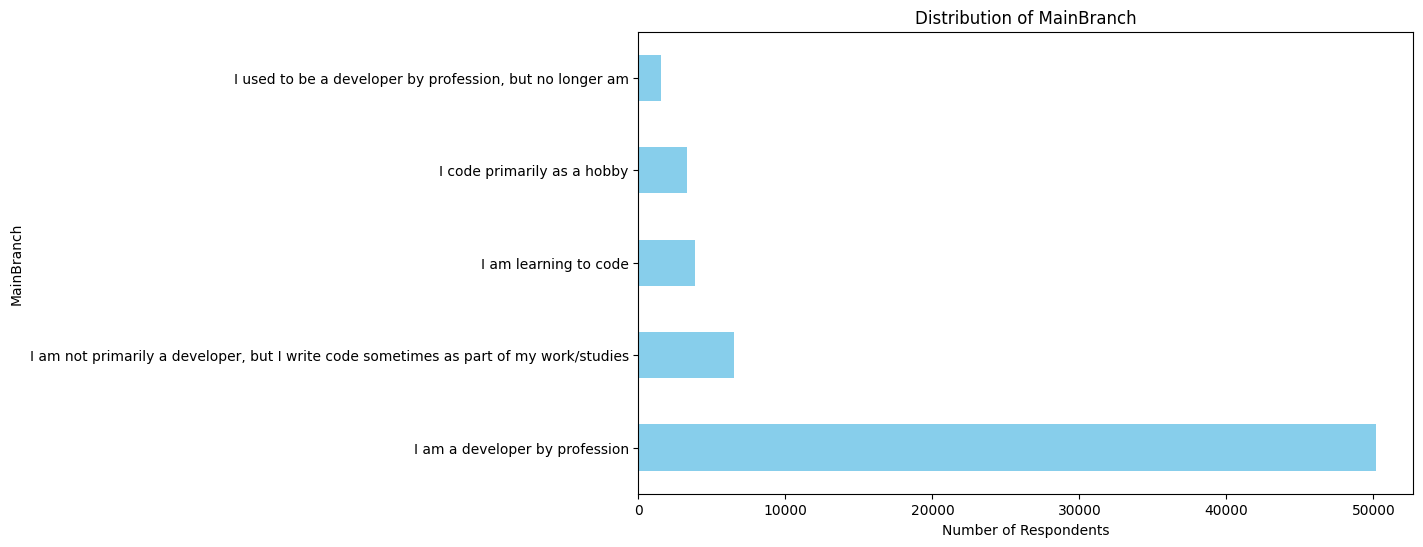

In [16]:
mainbranch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



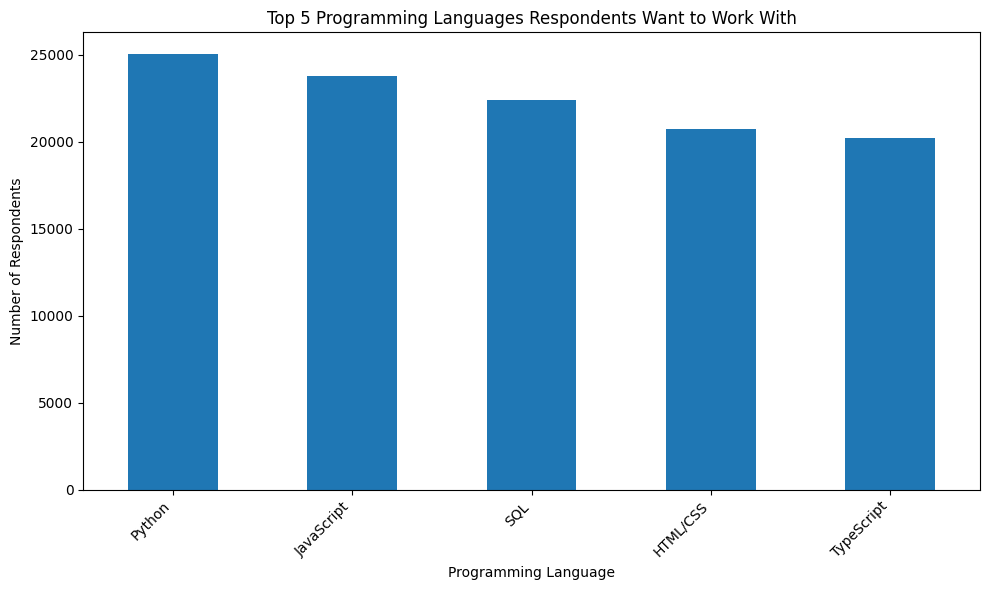

In [15]:
language_counts = df['LanguageWantToWorkWith'].str.split(';', expand=True).stack().value_counts()
top_5_languages = language_counts.head(5)

plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


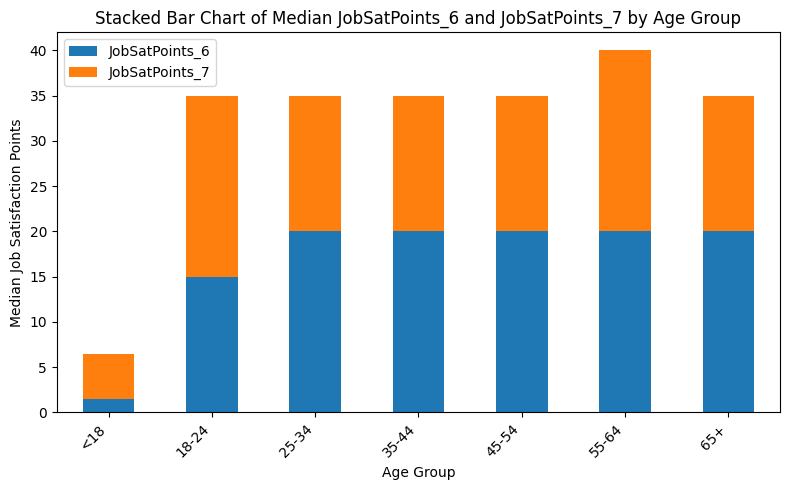

In [38]:
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where Age_numeric is NaN (for 'Prefer not to say')
df_filtered_age_numeric = df.dropna(subset=['Age_numeric']).copy()

# Create age groups using pd.cut on the numerical age
df_filtered_age_numeric['Age_Group'] = pd.cut(df_filtered_age_numeric['Age_numeric'],
                                              bins=[0, 18, 25, 35, 45, 55, 65, float('inf')],
                                              labels=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                                              right=False) # Use right=False to include lower bound and exclude upper bound


job_sat_by_age = df_filtered_age_numeric.groupby('Age_Group')[['JobSatPoints_6', 'JobSatPoints_7']].median()

job_sat_by_age.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Stacked Bar Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



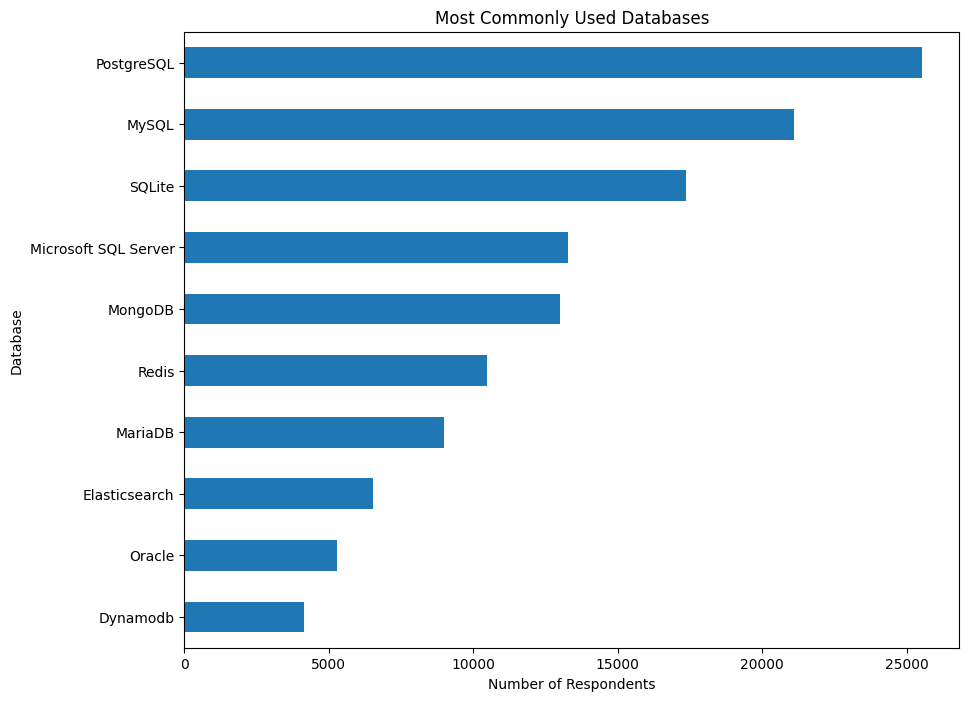

In [6]:
database_counts = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()

# Select the top N databases for clarity (optional)
top_n_databases = database_counts.head(10) # Adjust the number as needed

# Create the bar chart
plt.figure(figsize=(10, 8))
top_n_databases.plot(kind='barh')
plt.title('Most Commonly Used Databases')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.gca().invert_yaxis() # Invert the y-axis to have the most frequent at the top
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



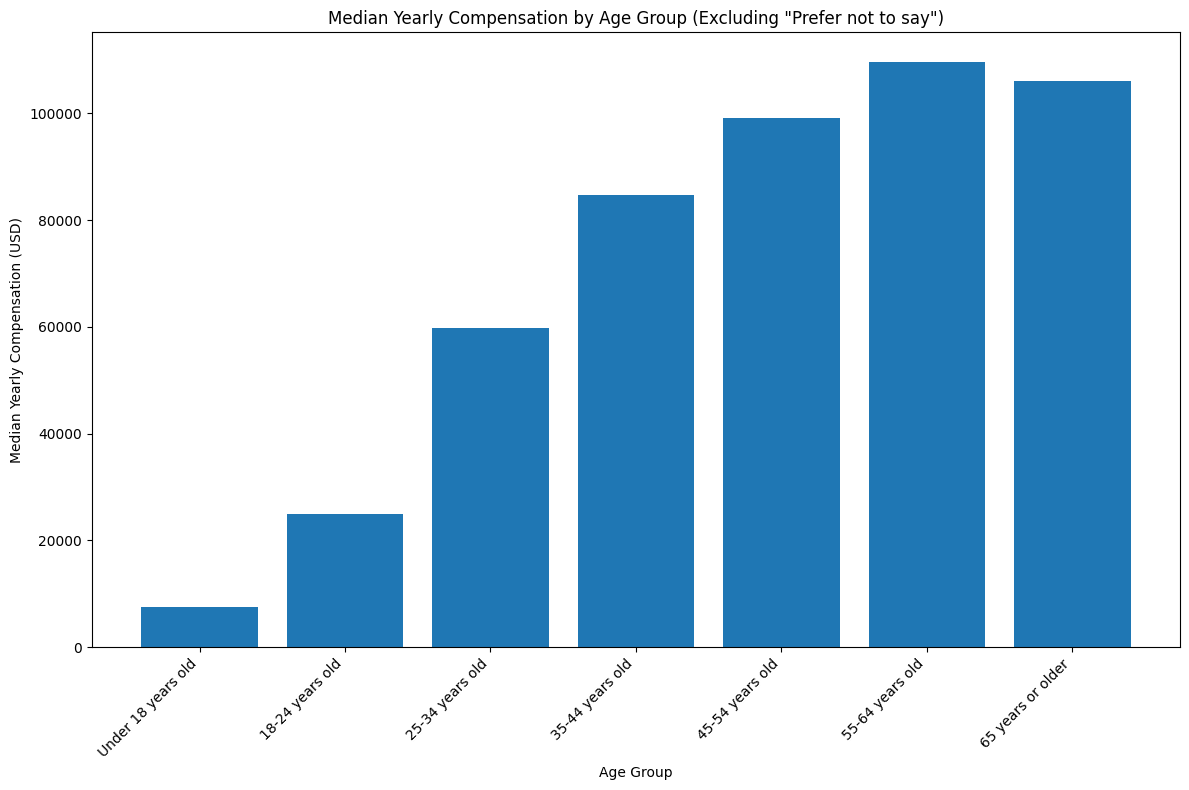

In [9]:
# Exclude 'Prefer not to say' from Age
df_filtered_age = df[df['Age'] != 'Prefer not to say'].copy()

# Convert ConvertedCompYearly to numeric, coercing errors to NaN
df_filtered_age['ConvertedCompYearly'] = pd.to_numeric(df_filtered_age['ConvertedCompYearly'], errors='coerce')

# Drop rows where ConvertedCompYearly is NaN after conversion
df_filtered_age.dropna(subset=['ConvertedCompYearly'], inplace=True)

# Calculate the median compensation for each age group
median_comp_by_age = df_filtered_age.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Sort age groups for better visualization
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
median_comp_by_age['Age'] = pd.Categorical(median_comp_by_age['Age'], categories=age_order, ordered=True)
median_comp_by_age = median_comp_by_age.sort_values('Age')

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(median_comp_by_age['Age'], median_comp_by_age['ConvertedCompYearly'])
plt.title('Median Yearly Compensation by Age Group (Excluding "Prefer not to say")')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



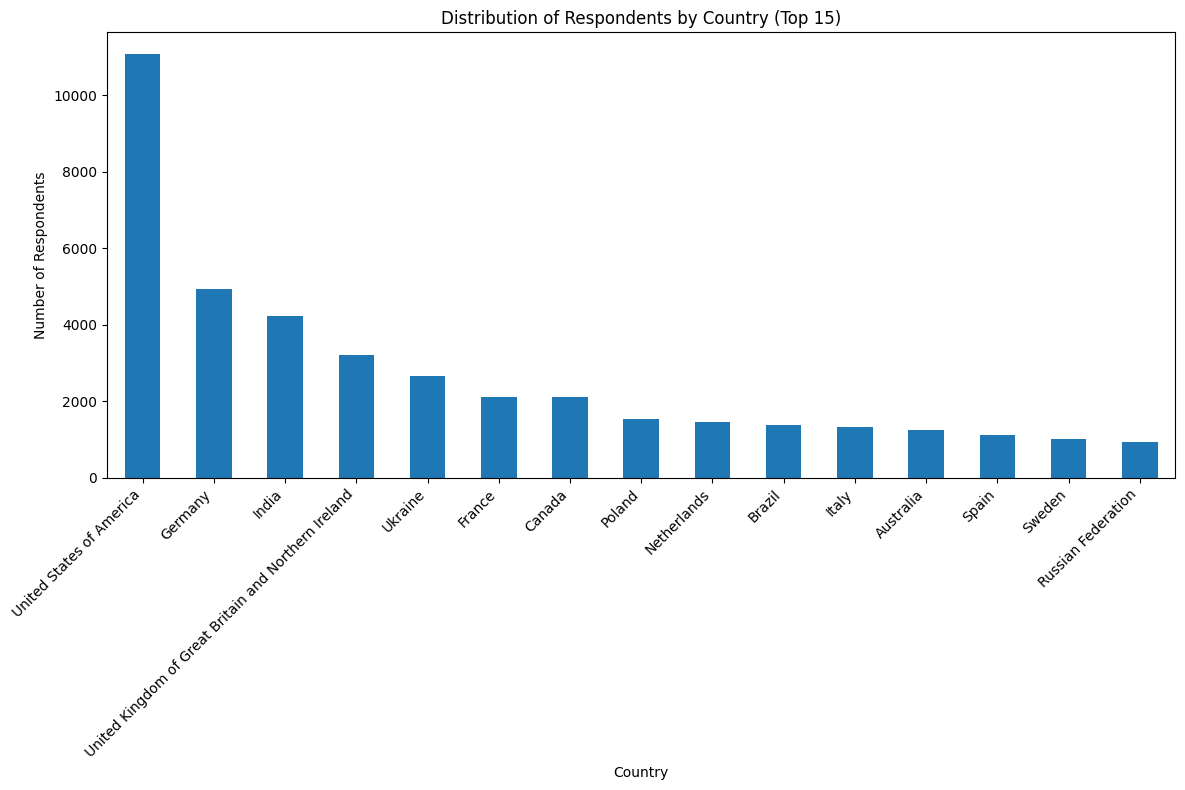

In [7]:
country_counts = df['Country'].value_counts()

# Select the top N countries for clarity (optional)
top_n_countries = country_counts.head(15) # Adjust the number as needed

# Create the bar chart
plt.figure(figsize=(12, 8))
top_n_countries.plot(kind='bar')
plt.title('Distribution of Respondents by Country (Top 15)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
